In [3]:
import matplotlib.pyplot as plt
import random

random.seed(123)
x = random.sample(range(1,100),50)
print(x)

[7, 35, 12, 53, 98, 14, 5, 49, 69, 72, 43, 44, 99, 21, 18, 88, 90, 89, 32, 86, 1, 56, 97, 92, 9, 79, 41, 58, 94, 6, 77, 19, 17, 3, 38, 78, 37, 31, 67, 62, 54, 66, 50, 20, 22, 34, 52, 60, 71, 39]


In [4]:
y = [0 for val in x]
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Dimension 1

<function matplotlib.pyplot.show(close=None, block=None)>

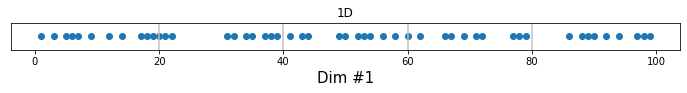

In [7]:
fig , ax = plt.subplots()
fig.set_size_inches(12,0.5)
plt.scatter(x,y)

for grid_pt in [20,40,60,80]:
    plt.axvline(x = grid_pt, color = "silver")

ax.set_xlabel('Dim #1',fontsize = 15)
plt.yticks([],[])
plt.title('1D')
plt.show

# Dimension 2

<function matplotlib.pyplot.show(close=None, block=None)>

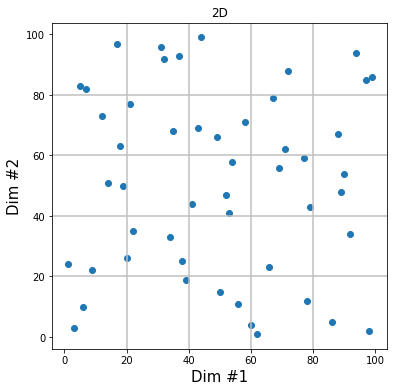

In [13]:
random.seed(123)
x = random.sample(range(1,100),50)
y = random.sample(range(1,100),50)

fig , ax = plt.subplots()
fig.set_size_inches(6,6)
plt.scatter(x,y)

for grid_pt in [20,40,60,80]:
    plt.axvline(x = grid_pt, color = "silver")
    plt.axhline(y = grid_pt, color = "silver")
    
ax.set_xlabel('Dim #1',fontsize = 15)
ax.set_ylabel('Dim #2',fontsize = 15)
plt.title('2D')
plt.show

In [28]:
import pandas as pd

data = pd.read_csv('/Users/kimhyunjo/Desktop/iris.csv')
data = data.iloc[:,0:4]
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Dimension 3

Text(0.5, 0, 'Dim #3')

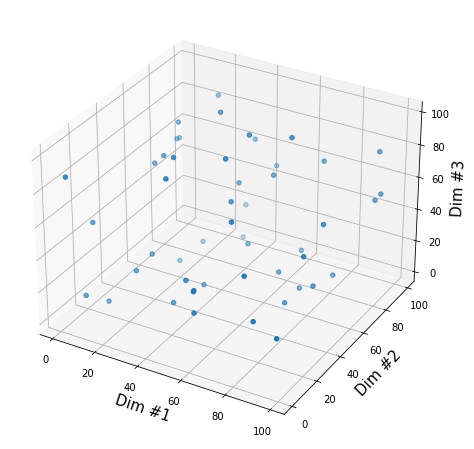

In [16]:
from mpl_toolkits import mplot3d

random.seed(123)
x = random.sample(range(1,100),50)
y = random.sample(range(1,100),50)
z = random.sample(range(1,100),50)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
fig.set_size_inches(8,8)
ax.scatter(x,y,z)

ax.set_xlabel('Dim #1',fontsize = 15)
ax.set_ylabel('Dim #2',fontsize = 15)
ax.set_zlabel('Dim #3',fontsize = 15)

In [30]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(data)
std_df = pd.DataFrame(std_df, index=data.index, columns=data.columns)
data = std_df
data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_array = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=[f"pca{num+1}" for num in range(data.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [33]:
import numpy as np

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.938085,0.729624,0.729624
pca2,0.920165,0.228508,0.958132
pca3,0.147742,0.036689,0.994821
pca4,0.020854,0.005179,1.000000


# PCA 이미지 분석

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import stats
import matplotlib.image as mpimg
import cv2

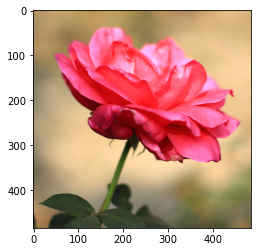

In [18]:
#img = Image.open('/Users/kimhyunjo/Desktop/flower.jpg')
img = cv2.cvtColor(cv2.imread('/Users/kimhyunjo/Desktop/flower.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [20]:
img.shape #높이 넓이 채널 / 채널이 3일경우 다색 1인 경우 단색

(485, 485, 3)

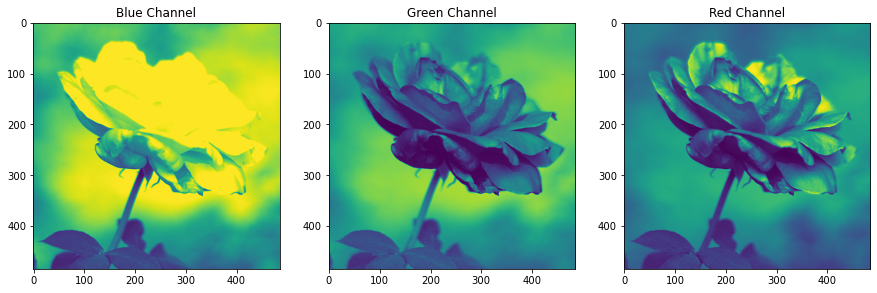

In [22]:
blue, green, red = cv2.split(img)

fig = plt.figure(figsize = (15,7))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)


fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)


fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [23]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,475,476,477,478,479,480,481,482,483,484
0,181,177,175,180,177,183,183,183,185,181,...,218,216,217,217,215,215,209,210,210,214
1,173,180,178,180,180,177,183,175,174,181,...,218,218,219,212,213,213,219,216,213,206
2,182,176,181,178,181,181,179,186,185,184,...,218,212,215,217,211,212,210,212,213,213
3,181,176,178,181,181,181,178,182,182,177,...,214,218,218,215,217,218,215,209,210,209
4,180,181,176,177,180,175,180,179,181,186,...,219,216,218,218,209,214,214,209,210,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,37,43,59,70,82,89,104,136,163,170,...,131,133,135,131,128,134,129,125,123,117
481,39,36,49,58,78,88,104,118,148,170,...,142,133,130,134,129,127,126,127,122,122
482,65,56,42,55,73,81,95,114,133,155,...,134,134,136,131,132,131,126,124,123,120
483,96,81,71,54,58,73,83,95,114,129,...,136,137,134,131,129,128,128,127,121,118


In [24]:
# 0과 1 사이로 정규화

df_blue = blue/255
df_green = green/255
df_red = red/255

In [26]:
#주성분을 50개
pca_b = PCA(n_components=50)
trans_pca_b = pca_b.fit_transform(df_blue)


pca_g = PCA(n_components=50)
trans_pca_g = pca_g.fit_transform(df_green)


pca_r = PCA(n_components=50)
trans_pca_r = pca_r.fit_transform(df_red)

In [35]:
print(trans_pca_b.shape)
print(trans_pca_g.shape)
print(trans_pca_r.shape)

(485, 50)
(485, 50)
(485, 50)


In [36]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9933957242176129
Green Channel: 0.990605421269907
Red Channel  : 0.9840899526429718


<BarContainer object of 50 artists>

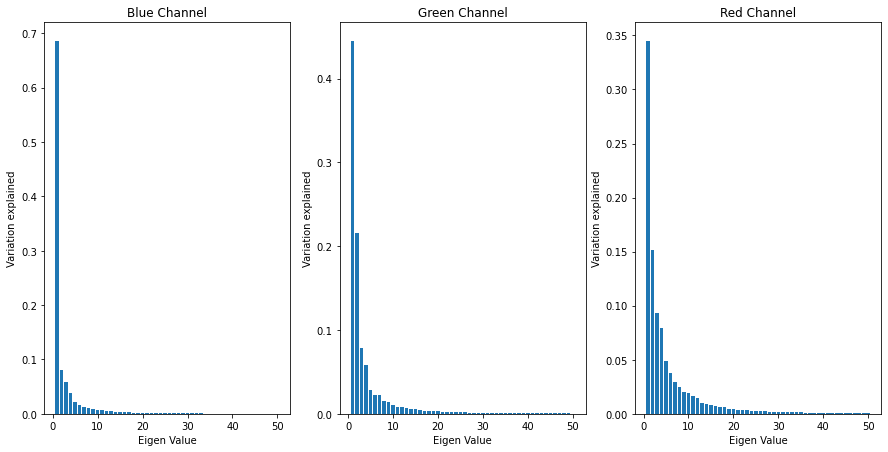

In [37]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)


fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)


fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)

In [38]:
# 다시 역변환
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(485, 485) (485, 485) (485, 485)


In [39]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(485, 485, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


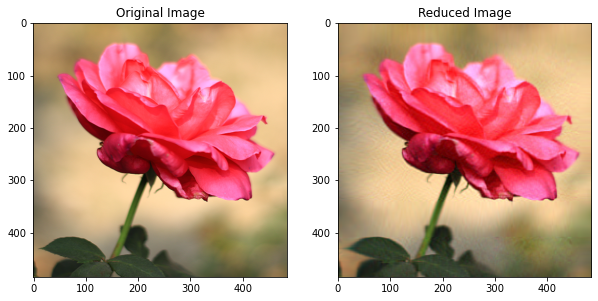

In [40]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)


fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()